In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_row',50) #показывать больше строк
pd.set_option('display.max_columns',50) #показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
stud

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Как видим выше, почти во всех столбцах есть пропуски. Давайте разбирать все столбцы по очереди и чистить их для нашей будущей моделе.

In [4]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

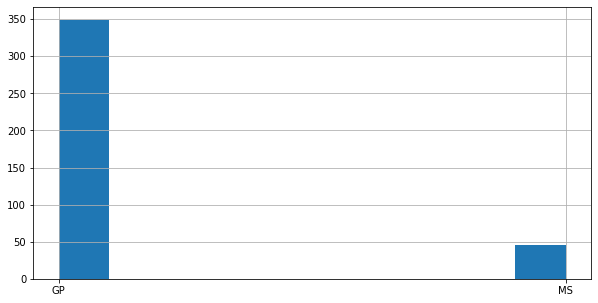

In [5]:
stud.school.hist(figsize=(10, 5));

In [6]:
# Пропусков в столбце нет так что
# переводим в цифровое значение
school = []
for i in stud['school']:
    if i == 'GP':
        school.append(0)
    elif i == 'MS':
        school.append(1)
stud['school'] = school

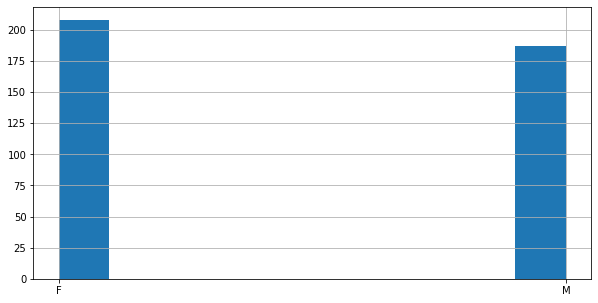

In [7]:
stud.sex.hist(figsize=(10, 5));

Видим что столбец пола так же полностью заполнен, для использования его в модели так же переводим его в числовой вид.

In [8]:
sex = []
for i in stud['sex']:
    if i == 'F':
        sex.append(0)
    elif i == 'M':
        sex.append(1)
stud['sex'] = sex

Следующая колонка это возраст она также полностью заполненна, оставляем ее как есть.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


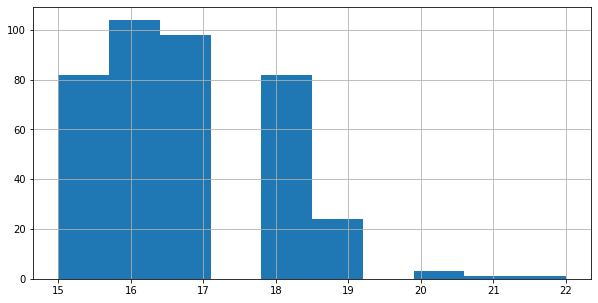

In [9]:
stud.age.hist(figsize=(10, 5));
stud.loc[:, ['age']].info()

Смотрим дальше.  
Адрес у нас обозначаеться двумя вариантами ответов: U - городской и R - за городом.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


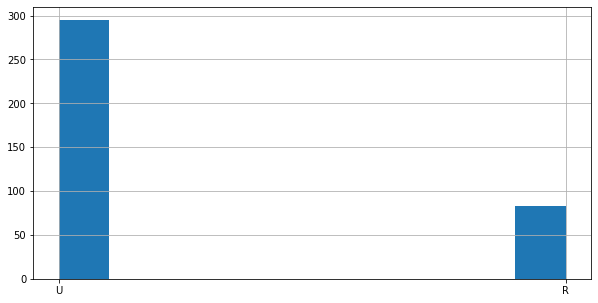

In [10]:
stud.address.hist(figsize=(10, 5));
stud.loc[:, ['address']].info()

Видим что не все данные заполненны, нехватает 17 значений. 
Предположим. что большенство студентов живут всётаки в городе и заполним пропуски 
значениями городского жилья.
Поралелно с этим преобразуем столбец в цифровую форму. Используем туже конструкцию чтои впредедущих случаях.

In [11]:
address = []
for i in stud['address']:
    if i == 'R':
        address.append(0)
    else:
        address.append(1)
stud['address'] = address

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   address  395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


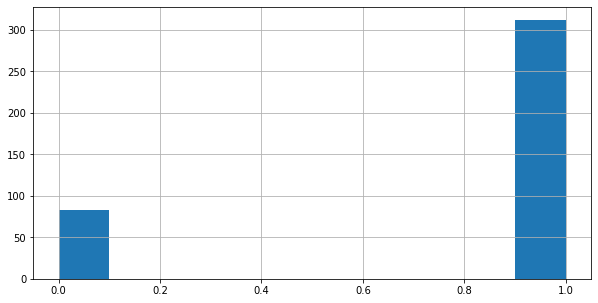

In [12]:
# Опять проверяем столбец адреса
stud.address.hist(figsize=(10, 5));
stud.loc[:, ['address']].info()

Ну вот, как мы видим все значения на месте и пропусков нет.

Смотрим следующий столбец. 
**famsize** Как мы видим в нем так же используется 2 значения: 
LE3 <= 3 ,
GT3 > 3  
Так же наблудаем пропуски значений.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


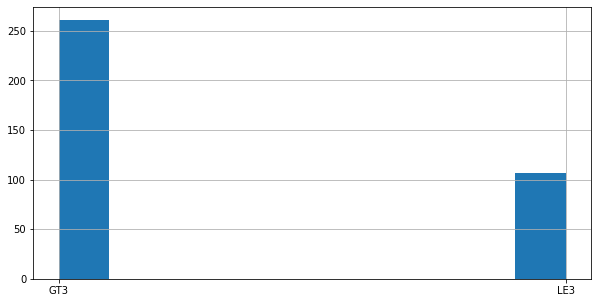

In [13]:
stud.famsize.hist(figsize=(10, 5));
stud.loc[:, ['famsize']].info()

Мы можем только догадываться о значениях в пустых ячейках, заменим пропуски так же на наиболее частое значение. 

In [14]:
famsize = []
for i in stud['famsize']:
    if i == 'LE3':
        famsize.append(0)
    else:
        famsize.append(1)
stud['famsize'] = famsize

Следующий столбец **Pstatus**. 
Видим пропуски, надеемся на лучьшее и заполнем пропуски значемем T. 
И переводим как всегда буквы в числа.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


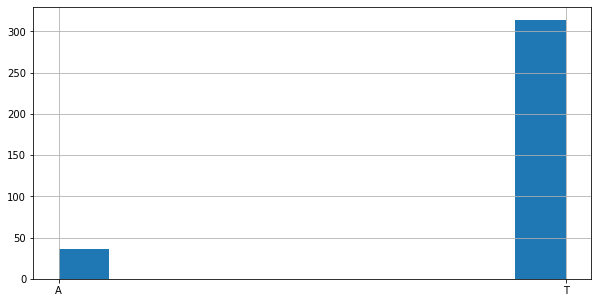

In [15]:
stud.Pstatus.hist(figsize=(10, 5));
stud.loc[:, ['Pstatus']].info()

In [16]:
Pstatus = []
for i in stud['Pstatus']:
    if i == 'A':
        Pstatus.append(0)
    else:
        Pstatus.append(1)
stud['Pstatus'] = Pstatus

Смотрим дальше, следующий столбец **Medu**, видим всего 3 незаполненные строки. 
Заполним их средним значением вариантов "2" , напишем для этого функци.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


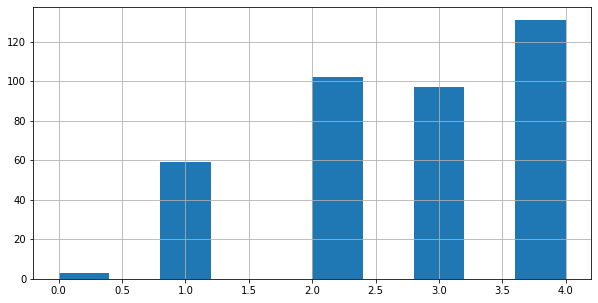

In [17]:
stud.Medu.hist(figsize=(10, 5));
stud.loc[:, ['Medu']].info()

In [18]:
# Функция заполнения пустых полей в образовании Матерей и отцов
def edu_clean(x):
    if x == 40.0:
        return 4.0
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return 2.0
        
    

In [19]:
stud.Medu = stud.Medu.apply(edu_clean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


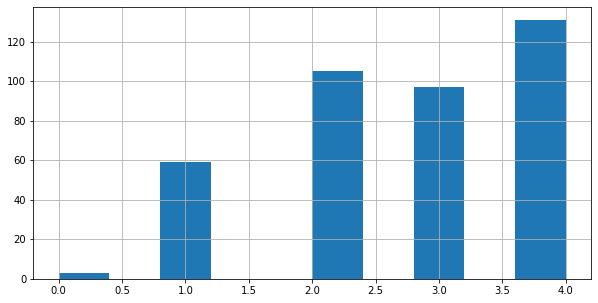

In [20]:
stud.Medu.hist(figsize=(10, 5));
stud.loc[:, ['Medu']].info()

После применения функуции видим отсутствие пропусков. В дальнейшем сможем этот пораметр использовать в модели для обучения.
Следующий параметр идентичен предедущему, так же применяем на нем нашу фукцию и заменяем пропуски на среднеарефметическое.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


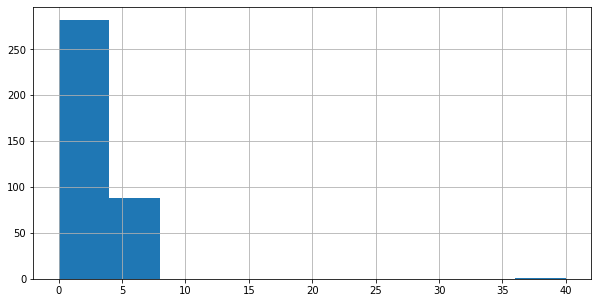

In [21]:
stud.Fedu.hist(figsize=(10, 5));
stud.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


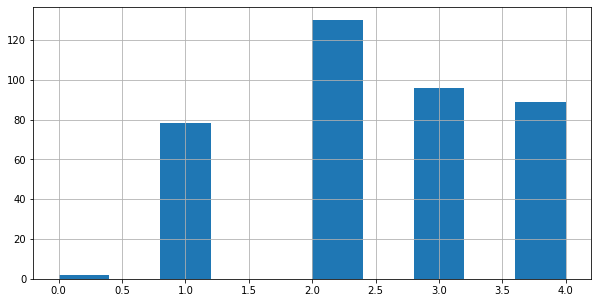

In [22]:
stud.Fedu = stud.Fedu.apply(edu_clean)
stud.Fedu.hist(figsize=(10, 5));
stud.loc[:, ['Fedu']].info()

Видим что пропусков нет.

Идем дальше, далее у нас идут 2 колонки с местами работы матери и отда студента.
Посмотрм их наполнение.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


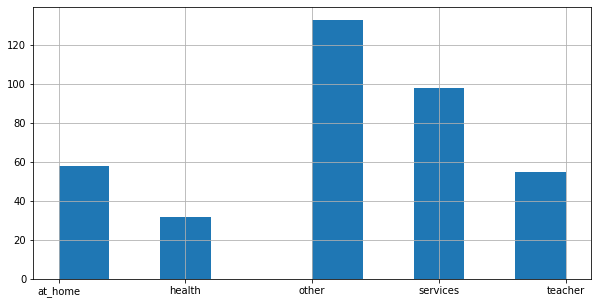

In [23]:
stud.Mjob.hist(figsize=(10, 5));
stud.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


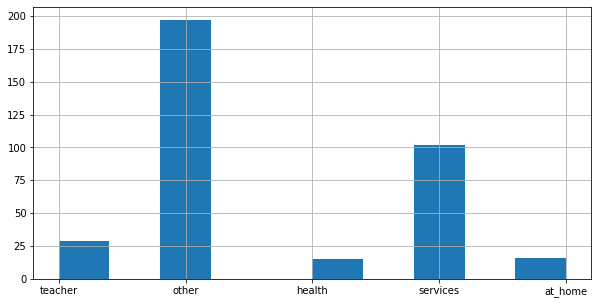

In [24]:
stud.Fjob.hist(figsize=(10, 5));
stud.loc[:, ['Fjob']].info()

Обе колонки имеют пропуски, нам пропуски не нравятся, заменим их на самый распространённый ответ.  
Напишем опять функцию для обоих колонок.

In [25]:
def other_job(x):
     if pd.notnull(x):
            return x
     if pd.isnull(x):
            x = "other"
            return x    

In [26]:
stud.Mjob = stud.Mjob.apply(other_job)
stud.Fjob = stud.Fjob.apply(other_job)

In [27]:
display(pd.DataFrame(stud.Mjob.value_counts()))
display(pd.DataFrame(stud.Fjob.value_counts()))
stud.loc[:, ['Mjob','Fjob']].info()

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    395 non-null    object
 1   Fjob    395 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


Пропуки мы убрали, думаю можно эти две колонки преобразовать с помощью метода get_dummies(), но нужно ли это? вот в чём вопрос.

Следующая колонка это **reason** 

In [28]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Заполняем пропуски с помощью нашей функции из предедущего отрезка. И смортим что получилось

In [29]:
stud.reason = stud.reason.apply(other_job)
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()

,reason
course,137
home,104
reputation,103
other,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


В следующем столбце **guardian** так же наверняка есть пропуски, давайте сразу пропустим его через нашу функцию и посмотрим что получилос.

In [30]:
stud.guardian = stud.guardian.apply(other_job)
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()

,guardian
mother,250
father,86
other,59


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Следующий столбец **traveltime** содержит 4 уникальных значения отвечающих за время затраченное на поезку до школы.  
И как мы видим он также содержить пропуски. Создадим для этого столбца и последующих с похожими значениями новую функцию.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


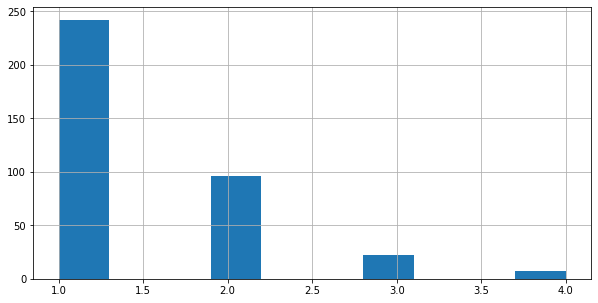

In [31]:
stud.traveltime.hist(figsize=(10, 5));
stud.loc[:, ['traveltime']].info()

In [32]:
def time(x):
    #будем заменять пропуски в полях на среднее значение, так как среднее не ровное число, округлим его в большую сторону и получим "3"
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return 3

In [33]:
stud.traveltime = stud.traveltime.apply(time)

Так же заполняем пропуски и в следующей колонке **studytime**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


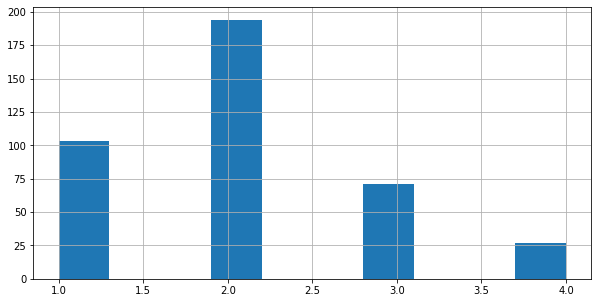

In [34]:
stud.studytime = stud.studytime.apply(time)
stud.studytime.hist(figsize=(10, 5));
stud.loc[:, ['studytime']].info()

Смотрим следуюшую колонку **failures**.  
Предыдущая функция нам опятьне подходит. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


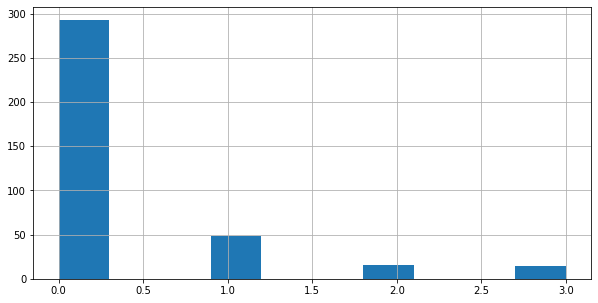

In [35]:
stud.failures.hist(figsize=(10, 5));
stud.loc[:, ['failures']].info()

Давайте будем оптимистами как всегда и будем думать что пропуски в данной категоии это отсутствие неудач.  
Заменим пропуски на 0

In [36]:
def fail(x):
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


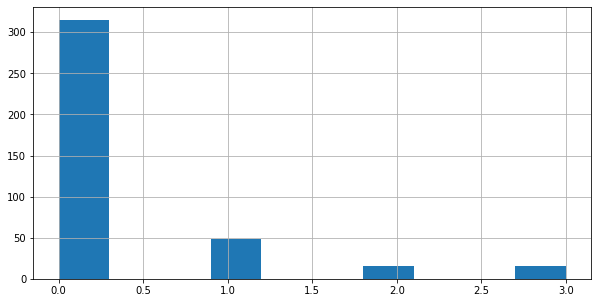

In [37]:
stud.failures = stud.failures.apply(fail)
stud.failures.hist(figsize=(10, 5));
stud.loc[:, ['failures']].info()

Следующие 8 колонок содержат ответы да или нет давайте посмотрим что там с пропусками.

In [38]:
stud.loc[:, ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolsup   386 non-null    object
 1   famsup      356 non-null    object
 2   paid        355 non-null    object
 3   activities  381 non-null    object
 4   nursery     379 non-null    object
 5   higher      375 non-null    object
 6   internet    361 non-null    object
 7   romantic    364 non-null    object
dtypes: object(8)
memory usage: 24.8+ KB


Как видно выше везде есть пропуски, напишем функцию и заполним пропуски положительными ответами(если нам не 
понравиться резльтат на тестировании изменим ответы на противоположные)

In [39]:
def yes_or_no(x):
    if x == 'no':
        return 0
    else:
        return 1    

In [40]:
stud.schoolsup = stud.schoolsup.apply(yes_or_no)
stud.famsup = stud.famsup.apply(yes_or_no)
stud.paid = stud.paid.apply(yes_or_no)
stud.activities = stud.activities.apply(yes_or_no)
stud.nursery = stud.nursery.apply(yes_or_no)
stud.higher = stud.higher.apply(yes_or_no)
stud.internet = stud.internet.apply(yes_or_no)
stud.romantic = stud.romantic.apply(yes_or_no)

In [41]:
stud.loc[:, ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   schoolsup   395 non-null    int64
 1   famsup      395 non-null    int64
 2   paid        395 non-null    int64
 3   activities  395 non-null    int64
 4   nursery     395 non-null    int64
 5   higher      395 non-null    int64
 6   internet    395 non-null    int64
 7   romantic    395 non-null    int64
dtypes: int64(8)
memory usage: 24.8 KB


Далее рассмотрим загадочный столбец **studytime, granular** в описании датасета его нет, но в самом дата сете он есть и состоит из 4 значений.
Так же мы видим что присутствуют пропуски. Заполним их самым распространённым значением. "-6"

In [42]:
display(pd.DataFrame(stud['studytime, granular'].value_counts()))
stud.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [43]:
def granular(x):
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return -6  

In [44]:
stud['studytime, granular'] = stud['studytime, granular'].apply(granular)
display(pd.DataFrame(stud['studytime, granular'].value_counts()))
stud.loc[:, ['studytime, granular']].info()

,"studytime, granular"
-6.0,201
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


Следующие 4 колонки **famrel, freetime,goout,health** содержат значения от 1 до 5 посмотрим на информацию про эти колонки

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   famrel    368 non-null    float64
 1   freetime  384 non-null    float64
 2   goout     387 non-null    float64
 3   health    380 non-null    float64
dtypes: float64(4)
memory usage: 12.5 KB


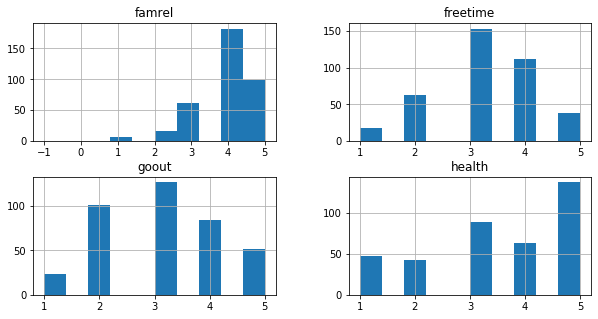

In [45]:
stud.loc[:, ['famrel','freetime','goout','health']].hist(figsize=(10, 5));
stud.loc[:, ['famrel','freetime','goout','health']].info()

Как мы видим, во всех столбцах есть пропуски, а так же в столбце **famrel** обноружелось отклонение от стандартных 5 значений, явно ошибка при заполнении.
Давайте пропуски заменим на среднее значение а отрицательное значение на '1'. Для этого напишем функцию.

In [46]:
def one_to_five(x):
    if x < 1.0:
        return 1.0
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return 3.0        

In [47]:
stud['famrel'] = stud['famrel'].apply(one_to_five)
stud['freetime'] = stud['freetime'].apply(one_to_five)
stud['goout'] = stud['goout'].apply(one_to_five)
stud['health'] = stud['health'].apply(one_to_five)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   famrel    395 non-null    float64
 1   freetime  395 non-null    float64
 2   goout     395 non-null    float64
 3   health    395 non-null    float64
dtypes: float64(4)
memory usage: 12.5 KB


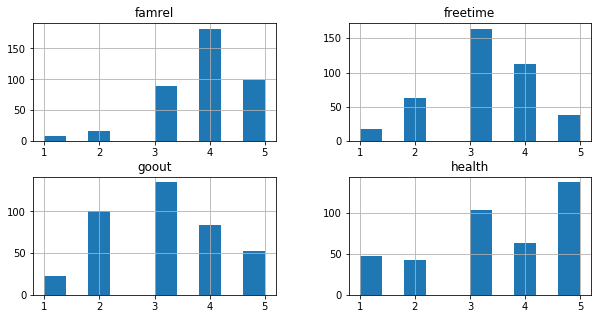

In [48]:
stud.loc[:, ['famrel','freetime','goout','health']].hist(figsize=(10, 5));
stud.loc[:, ['famrel','freetime','goout','health']].info()

Пропуски и странные отрицательные значения ушли. Посмотрим теперь на следающий столбец.  
**absences** тут собранны данные о пропущенных занятиях наших учеников.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


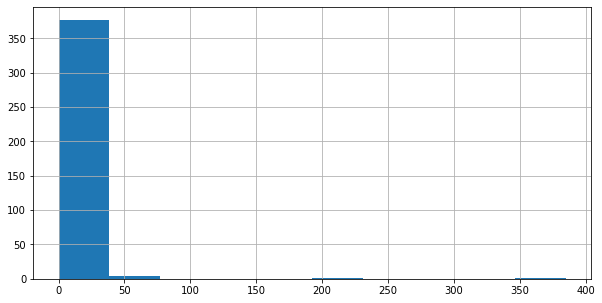

In [49]:
stud.absences.hist(figsize=(10, 5));
stud.loc[:, ['absences']].info()

На гистаграмме не очень видно что у нас за значения в этом случае. Давайте посмотрим на сами значения.

In [50]:
pd.DataFrame(stud.absences.value_counts())
stud.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Как видно выше, видны два явно выделяющихся значения. Возможно это закоренелые прогульщики, вообще не поевляющихся на занятиях.  
Но всётаки давайте допустим что это всёже ошибка ввода. Если мы уменьшим эти выбросы в 10 раз то они хорошо впишутся в общую картину.
Так же Заполнем пропуски самым распространённым значение 0.

In [51]:
def abs_norm(x):
    if x > 100:
        return x/10
    if pd.notnull(x):
        return x
    if pd.isnull(x):
        return 0 
    

In [52]:
stud['absences'] = stud['absences'].apply(abs_norm)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


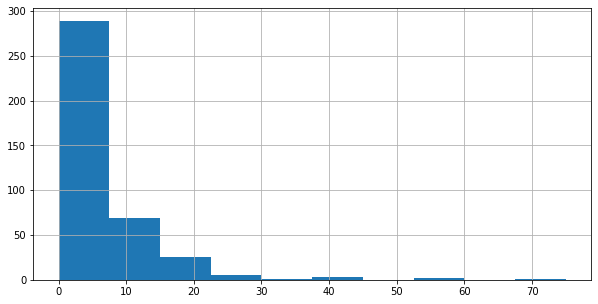

In [53]:
stud.absences.hist(figsize=(10, 5));
stud.loc[:, ['absences']].info()

Ну вот, так данный столбец выглядит лучьше.  
Остался последний столбец **score** давайте посмотрим на него.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

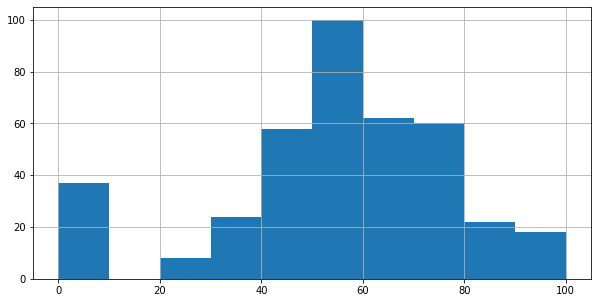

In [54]:
stud.score.hist(figsize=(10, 5));
stud.loc[:, ['score']].info()
stud.score.describe()

Именно этот столбец мы будем придсказывать в нашей моделе. Как мы видим в нем есть пропуски, так как мы не удаляли  
никакие данные из нашего датафрейма, давайте и тут не бдем ничего удалять.  Мало вероятно, так же , что кто то из учеников мог получить оценку 0.
Так кой результат мог появится если ученик вообще не сдавал этот экзамен. Удалять мы данный результат как и хотели, не будем.
Давайте заменим его как и пропуски медианным значение.


In [65]:
score = []
for i in stud['score']:
    if pd.isnull(i):
        score.append(stud.score.median())
    elif i == 0.0:
        score.append(stud.score.median())
    else:
        score.append(i)
stud['score'] = score   

Посмотрм, что у нас получилос.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   395 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


count    395.000000
mean      57.455696
std       15.315462
min       20.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

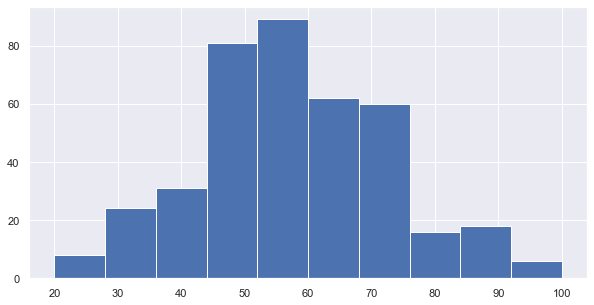

In [67]:
stud.score.hist(figsize=(10, 5));
stud.loc[:, ['score']].info()
stud.score.describe()

Мы убрали пропуски явный выброс, судя по графиу.  
Давайте посмотрим на весь датафрейм целиком.

In [71]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    int64  
 1   sex                  395 non-null    int64  
 2   age                  395 non-null    int64  
 3   address              395 non-null    int64  
 4   famsize              395 non-null    int64  
 5   Pstatus              395 non-null    int64  
 6   Medu                 395 non-null    float64
 7   Fedu                 395 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           395 non-null    float64
 13  studytime            395 non-null    float64
 14  failures             395 non-null    float64
 15  schoolsup            395 non-null    int

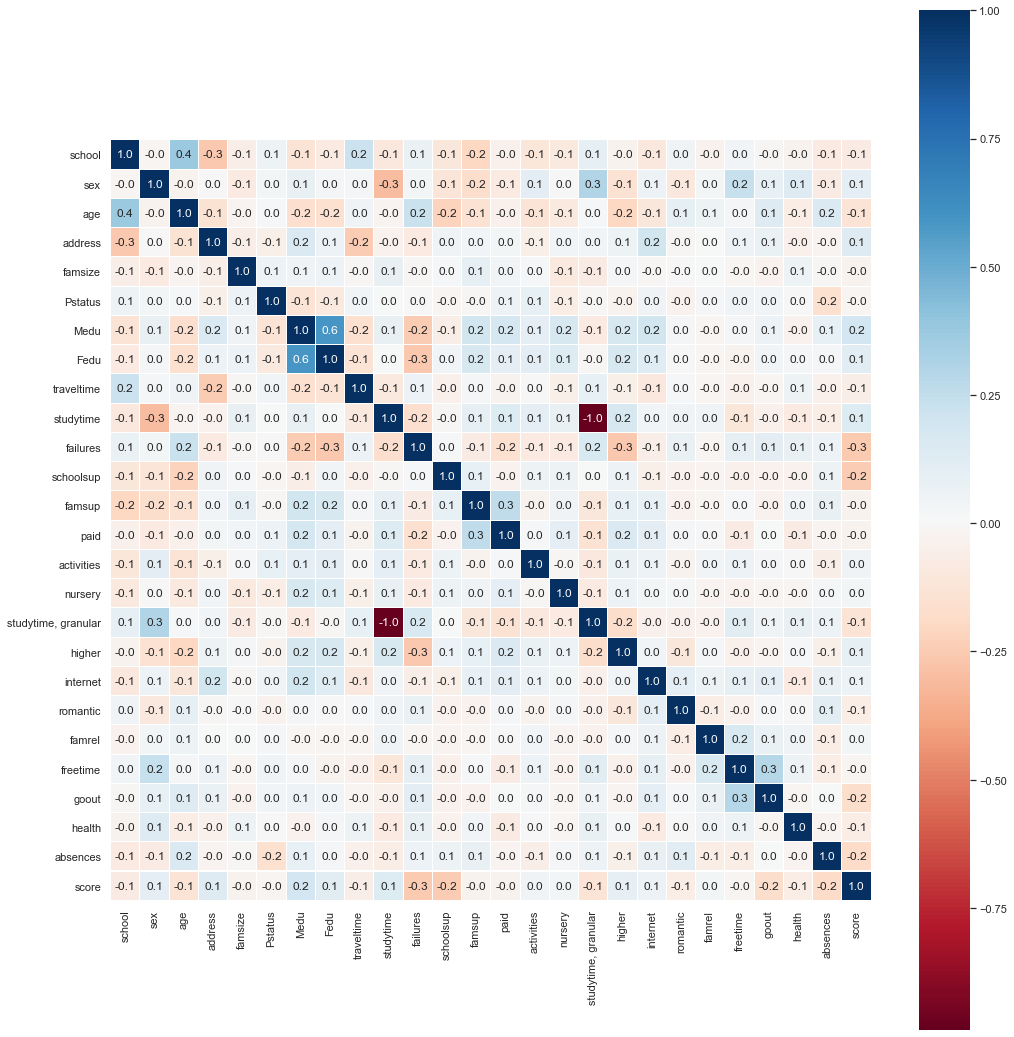

In [70]:
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(stud.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()

Как мы видим у нас есть несколько признаков сильно корелирующих друг с другом.  
Это Medu и Fedu а так же колонки studytime и studytime, granular. Давайте уберём по одному признаку из этих пар.  
Мы убираем Fedu и studytime, granular

In [72]:
stud.drop(['Fedu','studytime, granular'], inplace = True, axis = 1)

Ещё раз смотрим кореляцию на тепловой карте.

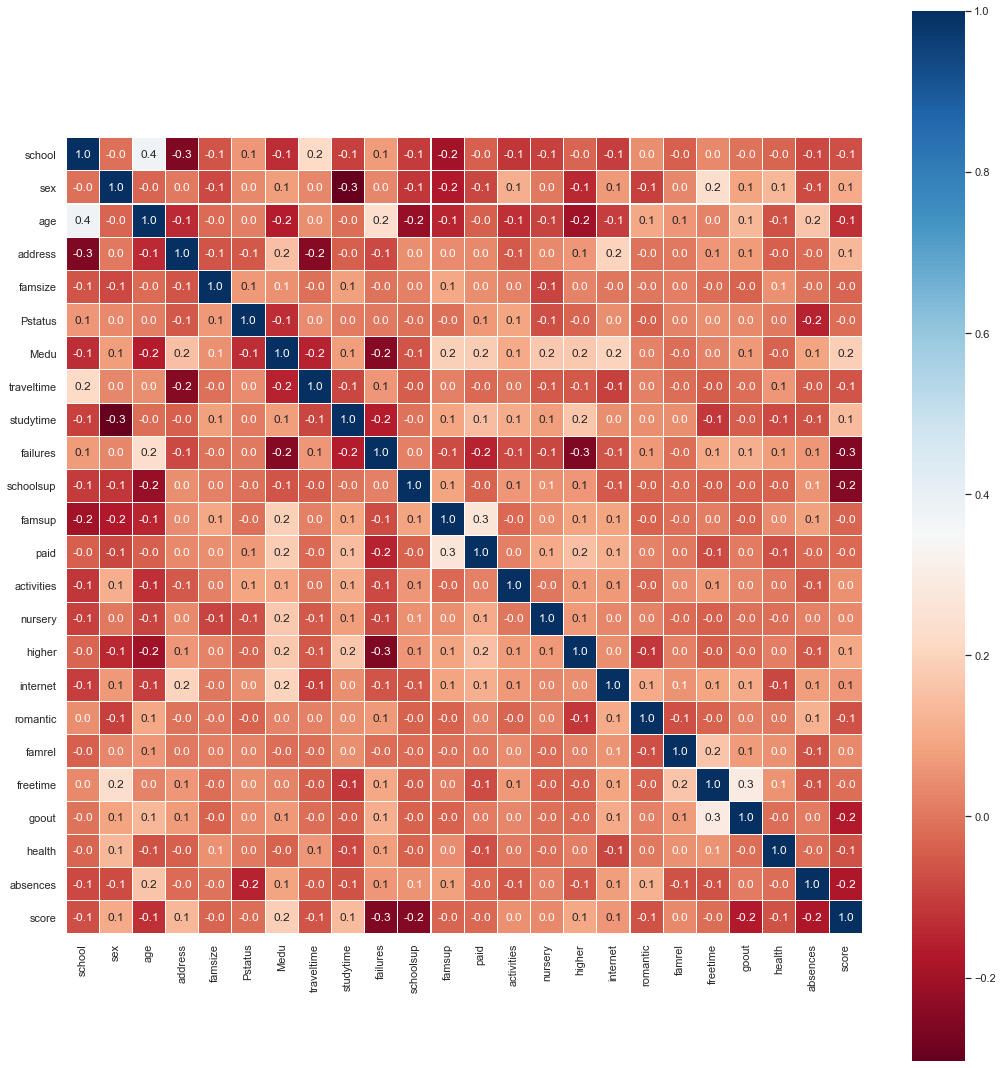

In [73]:
sns.set(font_scale=1)
plt.subplots(figsize=(15, 15))
sns.heatmap(stud.corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()

Далее давайте воспользуемся функцией из лекции и посмотрим какие из параметров статически значимы.  
Воспользуемся тестом Стьюдента.

In [74]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [75]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'traveltime', 'studytime','failures', 'schoolsup', 'famsup',
        'paid', 'activities', 'nursery','higher', 'internet', 'romantic',
        'famrel', 'freetime', 'goout', 'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


C:\Users\ytonu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\ytonu\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\ytonu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\ytonu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\ytonu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Мы получили пааметры которые сильнее всего влияют на значение нашего параметро score, их мы и будем использовать при постраении модели.

In [76]:
stud_for_model = stud.loc[:, ['sex','address','Medu','studytime','failures','schoolsup','goout','absences','score']]
stud_for_model.head()

,sex,address,Medu,studytime,failures,schoolsup,goout,absences,score
0,0,1,4.0,2.0,0.0,1,4.0,6.0,30.0
1,0,1,1.0,2.0,0.0,0,3.0,4.0,30.0
2,0,1,1.0,2.0,3.0,1,2.0,10.0,50.0
3,0,1,4.0,3.0,0.0,0,2.0,2.0,75.0
4,0,1,3.0,2.0,0.0,0,2.0,4.0,50.0
